<h1>CSE 574 - Introduction to Machine Learning</h1>

<h3> Importing Libraries</h3>

In [27]:
#Importing library
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
from keras.utils import np_utils
from sklearn import metrics
%matplotlib inline
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
!pip install keras==2.3.0
from keras.optimizers import SGD
from keras import regularizers
from keras.regularizers import l2
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import optimizers
import keras.backend as K

<h3>Importing Dataset</h3>

In [31]:
from keras.datasets import fashion_mnist
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

<h3>Data Pre-processing</h3>

In [32]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [33]:
#Partioning the dataset
X_test = X_train[-10000:]
y_test = y_train[-10000:]
X_train = X_train[:X_train.shape[0]-10000]
y_train = y_train[:y_train.shape[0]-10000]

In [34]:
#Dividing the dataset into group of 100 of each class
value = {}
for i in range(10):
    value[i] = list()

for i in range(len(X_train)):
    value[y_train[i]].append(X_train[i])

train_x = list()
train_y = list()

for i in range(len(value)):
    for j in range(100):
        train_x.append(value[i][j])
        train_y.append(i)

train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
train_y = np_utils.to_categorical(train_y)
y_test= np_utils.to_categorical(y_test)

In [35]:
learning_rate=[]
class LearningSpeed(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        optimizer = self.model.optimizer
        Intial_rate =tf.cast(optimizer.lr, tf.float32)
        Decay= 0.01
        iterations= tf.cast(optimizer.iterations, tf.float32)
        Intial_rate = (Intial_rate / (1. + Decay * iterations))
        learning_rate.append(tf.keras.backend.eval(Intial_rate))

In [36]:
#Model Define
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(30, kernel_initializer='normal', activation='sigmoid',W_regularizer=l2(5)))
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1), metrics=['accuracy'])
callbacks_list=[LearningSpeed()]
history=model.fit(train_x, train_y, validation_data=(X_test, y_test), epochs=30, batch_size=10,callbacks=callbacks_list, verbose = 0)

/Users/jyoti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, kernel_initializer="normal", activation="sigmoid", kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________



In [43]:
#Accuracy Calculation
test_loss,test_acc = model.evaluate(X_test,y_test)
print(test_acc*1000)

10000/10000 [==============================] - 1s 99us/step
97.00000286102295


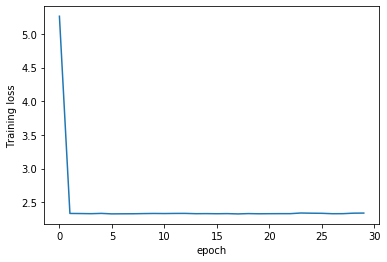

In [38]:
# #Plot between Training loss vs epoch
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.ylabel('Training loss')
plt.xlabel('epoch')
plt.show()

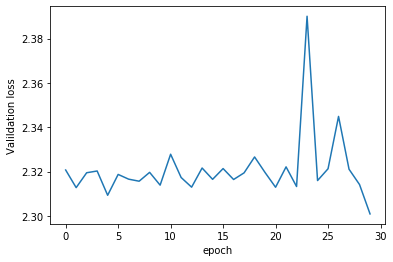

In [39]:
# #Plot between Validation Loss vs epoch
plt.plot(history.history['val_loss'])
plt.ylabel('Valildation loss')
plt.xlabel('epoch')
plt.show()

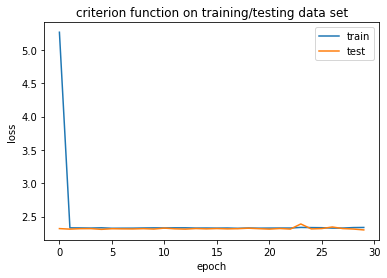

In [40]:
#Plot of Training loss vs Testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.title('criterion function on training/testing data set')
plt.show()

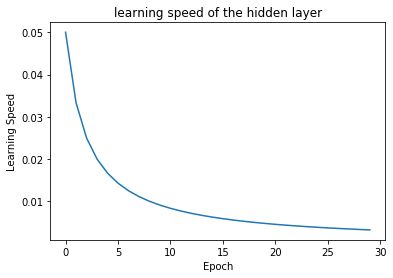

In [41]:
#Plot of Learning rate vs epoch
plt.xlabel('Epoch')
plt.ylabel('Learning Speed')
plt.title('learning speed of the hidden layer')
plt.plot(learning_rate)
plt.show()